## Course Code: DS4003
## Course Name: Principles and Techniques for Data Science
## Lab Session: 11-12 - Logistic Regression, Neural Networks

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tqdm.auto import tqdm 
import random 
import warnings 
warnings.simplefilter('ignore')

# Today's Topic

* Sigmoid 
* Entropy 
* Entropy of Bernoulli Distribution 
* Cross Entropy
* Binary Cross Entropy 
* Logistic Regression 
* Neural Network 


## Task: Implement the Logit Function 

$logit(p) = \log(\frac{p}{1 - p})$ 

In [2]:
def logit(p):
    # your code here
    
    return NotImplemented

## Task: Visualize the logit function 

In [3]:
def plot_function(X, func):     
    # Your code here 
    return NotImplemented



In [4]:

X = np.linspace(0, 1, 1000)
plot_function(X, logit)

NotImplemented

## The curve you have seen on the lecture is a sigmoid curve which is a inverse of logistic function 

## Task: Let's implement Sigmoid function and visualize it 
Implement the sigmoid funciton below and we will use the previous plot_function function to visualize it. 

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

In [5]:
def sigmoid(x): 
    # your code here 
    return NotImplemented

In [6]:
X = np.linspace(-5, 5, 1000)
plot_function(X, sigmoid)

NotImplemented

## Entropy 

Entropy has different definition for different field. For AI and computer science student, entropy is the inherent uncertainty associated with the outcome of a random variable. For a Random Variable X, the entropy is :
$$\mathbb{E}(-\log(p(X))) = -\sum_{x\in X}p(x)\log(p(x))$$ 


### Additional resource: 

https://en.wikipedia.org/wiki/Expected_value

# Cross Entropy

Cross Entropy is the measure of total entropy between different probability distributions over the same underlying set of events. A generalized equation for Cross-Entropy is 

$$H(p, q) = -\mathbb{E}_p(\log{q})$$ 

where p is the true probability distribution and q is the observed/ predicted probability distribution. 

If $\mathcal{X}$ is the set of outcomes then the cross-entropy for its true probability and predicted probability distribution will be 

$$H(P, Q) = -\sum_{x \in \mathcal{X}}p(x)\log(q(x))$$

p(x) is the true outcome distribution of the data, for the sake of readability let's re-write the equation with $t(x) \in T$ is the true outcome distribution of the data and $p(x) in P$ is the predicted outcome distribution.


$$H(T, P) = -\sum_{x \in \mathcal{X}}t(x)\log(p(x))$$


## Task: Implement BCE

In [7]:
def BCE(t, p): 
    # your code here 
    
    return NotImplemented

# Logistic Regression 

Losistic Regression is done by adding a sigmoid at the end of linear regression. 
$$\begin{equation} h(x_i) = x_iW + b\end{equation}$$

$$LR(x_i) = \sigma(h(x_i)) = \frac{1}{1 + e^{-h(x_i)}}$$


# Task: Now let's create a function that follows the above equation (3 minutes)

In [8]:
def LR(b, W, x, return_hidden=False): 
    """
    LR function implements the above equaiton. The inputs are:
    b: number, bias term of the logistic regresin
    W, ndarray, weight term of the logistic regression
    x, ndarray, the input data
    return_hidden, boolean, if true you should return the h(x_i) value of the above equation alogn with the output, otherwise return only output 
    """
    # your code here 
    return NotImplemented

## Now let's look at the scikit learn version of Logistic Regression

# We will create a simple Spiral Data

If you are interested in the spiral generation process : https://www.quora.com/What-is-the-general-equation-of-a-spiral

In [9]:

N = 400
theta = np.linspace(0, 2*np.pi, N)

r_a = 2*theta + np.pi
ax = np.cos(theta) * r_a + np.random.randn(N)
ay = np.sin(theta) * r_a + np.random.randn(N)


r_b = -2 * theta - np.pi
bx = np.cos(theta) * r_b + np.random.randn(N)
by = np.sin(theta) * r_b + np.random.randn(N)


In [10]:
x = np.vstack((ax.reshape(-1, 1), bx.reshape(-1, 1))).reshape(-1)
y = np.vstack((ay.reshape(-1, 1), by.reshape(-1, 1))).reshape(-1)
label = np.zeros(ax.shape[0] + bx.shape[0])
label[ax.shape[0]:] = 1

In [11]:
df = pd.DataFrame()
df['X'] = x 
df['Y'] = y 
df['Target'] = label

# Let's visualize the spirals

<Axes: xlabel='X', ylabel='Y'>

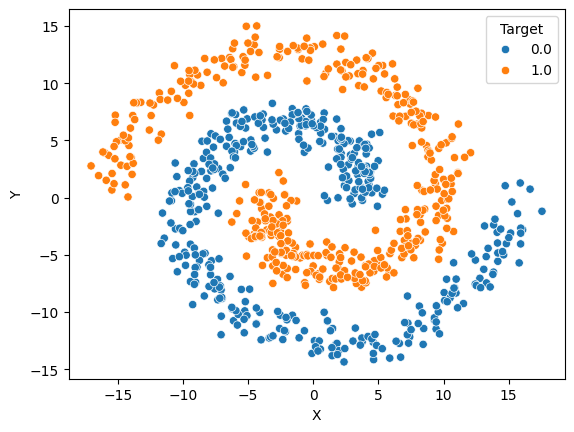

In [12]:
sns.scatterplot(data=df, x='X',y='Y', hue='Target')

# Try the Logistic Regression on Spiral data

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler() 
LR = LogisticRegression() 
X = df[["X", "Y"]].copy() 
y = df['Target'].values 
x = scaler.fit_transform(X)
LR.fit(x, y) 

LogisticRegression()

In [14]:
pred = LR.predict(x)
acc = accuracy_score(y_true=y, y_pred=pred)

In [15]:
acc

0.5125

# Now let's try a neural net with 1 hidden layer and two neurons 

In [16]:
import torch 
import torch.nn as nn 

In [17]:
class MyModel(nn.Module): 
    def __init__(self, in_feat, n_hidden, n_neuron, num_classes):
        super().__init__() 
        layers = list() 
        layers.append(nn.Linear(in_feat, n_neuron))
        layers.append(nn.Sigmoid()) 
        for _ in range(n_hidden - 1): 
            layers.append(nn.Linear(n_neuron, n_neuron))
            layers.append(nn.Sigmoid()) 
        self.encoder = nn.Sequential(*layers)
        
        self.fc = nn.Linear(n_neuron, num_classes)
    
    def forward(self, x): 
        feat = self.encoder(x) 
        out = self.fc(feat)
        return out 

In [18]:
from torch.utils.data import Dataset, DataLoader 
class DataFrameDataset(Dataset): 
    def __init__(self, df, data_cols, target_col, trf=None):
        self.trf = trf 
        self.df = df 
        self.data = df[data_cols].copy().values 
        self.target = df[target_col].values 
        
    def __len__(self): 
        return self.df.shape[0] 
    
    def __getitem__(self, index): 
        x = self.data[index]
        y = self.target[index]
        
        if trf is not None: 
            x = trf(x) 
        return x, y

# Let's process our data 

In [19]:
data = df[["X","Y"]].copy()
mean = np.array(data.mean())
std = np.array(data.std())


In [20]:
from torchvision import transforms

# PyTorch like class to do Normalization 

In [21]:
class Normalize: 
    def __init__(self, mean, std): 
        self.mean = mean 
        self.std = std 
        
    def __call__(self, x): 
        x = (x - mean) / std 
        return x 

# We will do transformation in PyTorch way

In [22]:
trf = transforms.Compose([
    Normalize(mean=mean, std=std),
    torch.tensor 
])

In [23]:
dataset = DataFrameDataset(df, ["X", "Y"], "Target", trf)

In [24]:
dataloader = DataLoader(dataset, batch_size=32)

# Our Universal Training Function 

In [25]:
def train_neural_net(model, dataloader, criterion, optimizer, n_epoch, device): 
    model.train() 
    best_loss = np.inf
    pbar = tqdm(total=n_epoch)
    losses = list()
    for epoch in range(n_epoch): 
        epoch_loss = list()
        for x, y in dataloader: 
            x = x.to(device).float()
            y = y.to(device).long() 
            
            logit = model(x) 
            loss = criterion(logit, y)
            loss.backward() 
            optimizer.step()
            epoch_loss.append(loss.item())
            pbar.set_postfix({'loss': loss.item()})
        avg_loss = np.mean(epoch_loss)
        losses.append(avg_loss)
        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'model.pt')
        pbar.update()
    pbar.close()
    plt.plot(losses)
    plt.show()

# Accuracy Function 

In [26]:
def nn_accuracy(model, test_loader): 
    preds = list()
    gts = list()
    with torch.no_grad():
        model.load_state_dict(torch.load('model.pt'))
        model.eval()
        for x, y in test_loader:
            x = x.to(device).float()
            logit = model(x)
            pred = torch.argmax(logit, dim=1).detach().cpu().numpy().tolist()
            preds.extend(pred)
            gts.extend(y.detach().cpu().numpy().tolist())

    acc = accuracy_score(y_true=np.array(gts), y_pred=np.array(preds))
    print(acc)

# Control Stochasticity 

In [27]:
def fix_seed(seed): 
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.random.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.enabled= True 
    torch.backends.cudnn.benchmark = False 
    torch.backends.cudnn.deterministic = True 
    

  0%|          | 0/500 [00:00<?, ?it/s]

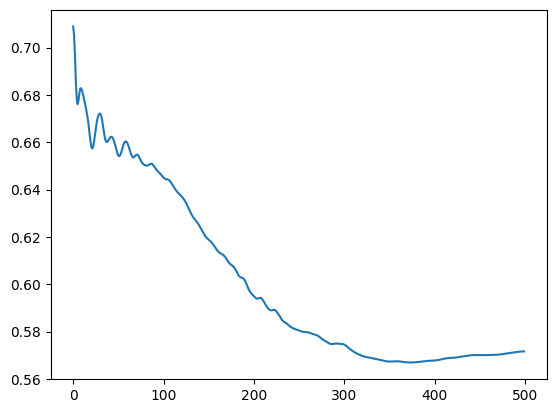

In [ ]:
fix_seed(0)
#device = torch.device('cuda:0')
device = torch.device('cpu')
model = MyModel(in_feat=2, n_hidden=1, n_neuron=2, num_classes=2).to(device)

criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.5, 0.99))

train_neural_net(model, dataloader, criterion, optimizer, 500, device)

In [29]:
nn_accuracy(model, dataloader)

0.645


# Task: Let's try with one hidden layer with four neurons 

In [30]:
fix_seed(0)
# your code here 

In [31]:
nn_accuracy(model, dataloader)

0.645


# Food for Thought: What does the performance difference tell you?

# Task: Next, two hidden layers with 4 neurons 

  0%|          | 0/500 [00:00<?, ?it/s]

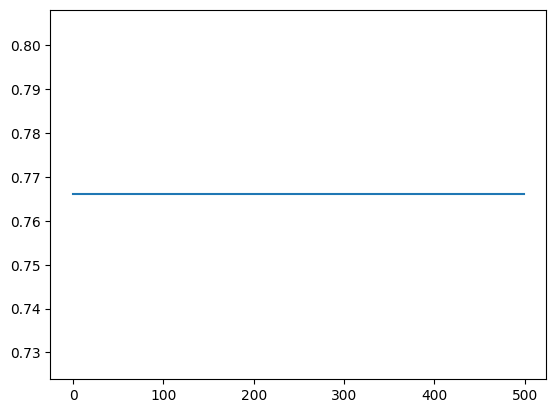

In [ ]:
# your code here
fix_seed(0)

#    def __init__(self, in_feat, n_hidden, n_neuron, num_classes):
model1 = MyModel(2, 1, 4, 2)

train_neural_net(model1, dataloader, criterion, optimizer, 500, device)

In [34]:
nn_accuracy(model1, dataloader)

0.5


In [42]:
device = torch.device('cuda:12')
model2 = MyModel(in_feat=2, n_hidden=2, n_neuron=4, num_classes=2)
train_neural_net(model2, dataloader, criterion, optimizer, 500, device)

  0%|          | 0/500 [00:00<?, ?it/s]

AssertionError: Torch not compiled with CUDA enabled

# Task: Replace Sigmoid with Relu in the model and run all the exp again

In [ ]:
# Your code here

# Task: Practise Building a complex neural network
a) Build a NN with 4 layers with 4, 8, 16, 100 neurons on the corresponding layers 

b) Extend the model in a) by adding the input of 1st Layer to the output of 2nd Layer

In [ ]:
# Your code here 

# How does a convolution layer behave?  

In [ ]:
conv_layer = nn.Conv2d(3, 8, 3, 1, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


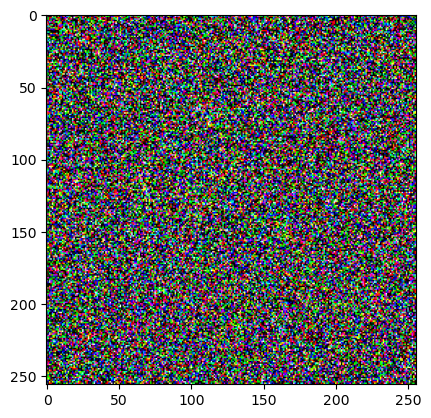

In [ ]:
random_noise = np.random.randn(256, 256, 3)
plt.imshow(random_noise) 

In [ ]:
noise_tensor = transforms.ToTensor()(random_noise)

In [ ]:
noise_tensor.shape

torch.Size([3, 256, 256])

In [ ]:
conv_out = conv_layer(noise_tensor.unsqueeze(0).float())

In [ ]:
conv_out.shape

torch.Size([1, 8, 256, 256])

# Convolutional Neural Network 



In [ ]:
class SimpleConvNet(nn.Module): 
    def __init__(self, in_channels, num_classes, img_size=28): 
        super().__init__() 
        layers = list()
        layers.append(nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=3, padding=1))
        layers.append(nn.BatchNorm2d(num_features=64))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(2, 2))
        layers.append(nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1))
        layers.append(nn.BatchNorm2d(num_features=128))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(2, 2))
    
        self.encoder = nn.Sequential(*layers)
        self.fc = nn.Linear(128 * (28 // 4) * (28 // 4), num_classes)
        
    def forward(self, x): 
        feat = self.encoder(x)
        feat = torch.flatten(feat, 1)
        out = self.fc(feat)
        return out 

# Let's train our CNN

  0%|          | 0/1 [00:00<?, ?it/s]

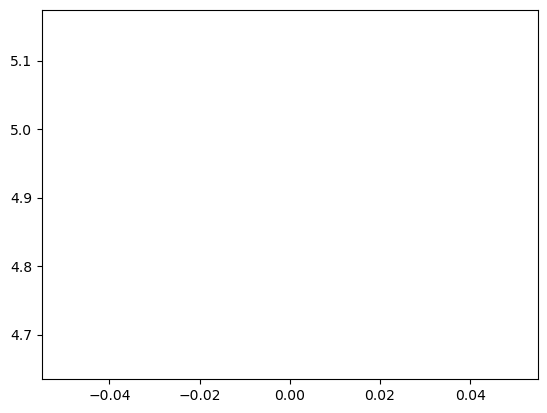

0.9157


In [ ]:
from torchvision import datasets
#device = torch.device('cuda:0')
device = torch.device('cpu')
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
train_set = datasets.MNIST('../data', train=True, download=True,
                   transform=transform)
test_set = datasets.MNIST('../data', train=False,
                   transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

model = SimpleConvNet(1, 10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

train_neural_net(model, train_loader, criterion, optimizer, 1, device)
nn_accuracy(model, test_loader)


# RNN Example has been shown in lab on Timeseries forecasting